<a href="https://colab.research.google.com/github/anamarigarzon/IR-Image-Analysis-in-Power-Systems/blob/main/Indoor-Power-Systems/IR_image_analysis_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thermographic Image Analysis - Transformer**

Dataset: https://ieeexplore-ieee-org.ez.urosario.edu.co/document/9349599

In this project Infrared Thermographic Images are processed to identify and classify transformer failures.

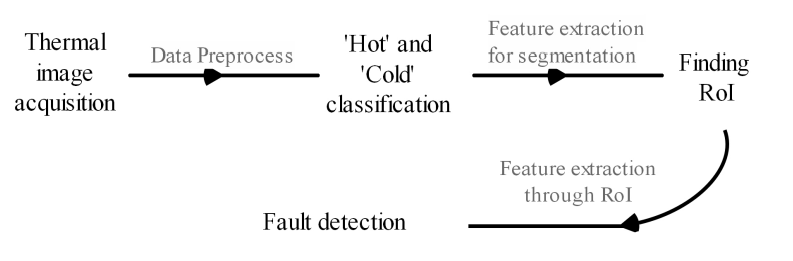


Packages:

In [1]:
import cv2 # Computer Vision Implementations in Python
import matplotlib.pyplot as plt # Create graphic visualizations in Python
import numpy as np #support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd
import os 
from google.colab import drive

** **

### **DATA PREPROCESS**

The first step is to get access to the images folder. This project was coded in Google Colab and the images were stored in a personal Google Drive folder. If you wish to execute it you can skip this process as the vectorization is stored in "dataset_motor.csv" that is included in the repository.

In [2]:
drive.mount("/content/drive") # Access drive folder for Google Colab

Mounted at /content/drive


Now, as the images have the same shape (240x320), we create a dataset that has a first column with the name of the file. The next step is to import the images in BGR space color (by defect in open cv), vectorize them by pixel and add a column with the image data. 

After that, the images are converted to gray and we get the maximum, minimum, mean and standard deviation of the values in gray scale, and we add them to the dataset. Finally, we add the label column.

To add the column with the image data we need to encode and decode the image. vectorizing it, converting it into a string. So next we have the code and decode functions:

In [3]:
def vectorize_image(image_data):
  image_string = ''
  for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
      for k in range(image_data.shape[2]):
        image_string += str(image_data[i][j][k])+','
  return image_string

def reverse_img_vectorization(image_string, num_rows, num_columns, space_color_dim):
  img_list = image_string.split(',')
  count = 0
  image_arr = []
  for i in range(num_rows):
    column = []
    for j in range(num_columns):
      color = []
      for k in range(space_color_dim):
        color.append(int(img_list[count]))
        count += 1
      column.append(color)
    image_arr.append(column)
  return image_arr

Creation of the dataset

In [4]:
dataset_transformer = pd.DataFrame() # Create dataset for the transformer
labels = ['p1_Noload','p2_80','p3_160','p4_240','p5_320','p6_400','p7_480','p8_560','p9_600'] # Failure or state label
hot_labels = ['p6_400','p7_480','p8_560','p9_600']
cold_labels = ['p1_Noload','p2_80','p3_160','p4_240','p5_320']

filenames = [] # list to store filenames 
image_data = [] # list to store image data
labels_list = [] # list to store labels
max_values = [] # list to store max value
min_values = [] # list to store min value
mean_values = [] # list to store mean value
std_values = [] # list to store standard deviation
temp_labels = [] # list to store temperature labels

# Importing images
for label in labels:
  folder_name = '/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/'+ label # Access the image
  for filename in os.listdir(folder_name):
    filenames.append(str(f'{filename}')) 
    image_file = f'{folder_name}/{filename}' # name of the file
    image_cv_read = np.array(cv2.imread(image_file)) # read image file
    image_gray = np.array(cv2.cvtColor(image_cv_read, cv2.COLOR_BGR2GRAY)) # image file in grayscale

    # Get values from grayscale image
    max_value = image_gray.max()
    min_value = image_gray.min()
    mean_value = np.mean(image_gray)
    std_value = np.std(image_gray)

    # Temperature labels
    if label in hot_labels:
      temp_label = 1 # cold images label = 0
    elif label in cold_labels:
      temp_label = 0 # cold images label = 0
    else:
      print('error')
      print(label)
    
    temp_labels.append(temp_label)

    # Add values to lists
    image_data.append(vectorize_image(image_cv_read))
    labels_list.append(label)
    max_values.append(max_value)
    min_values.append(min_value)
    mean_values.append(mean_value)
    std_values.append(std_value)


dataset_transformer['filename'] = filenames
dataset_transformer['image_data_BGR'] = image_data
dataset_transformer['max_value'] = max_values
dataset_transformer['min_value'] = min_values
dataset_transformer['mean_value'] = mean_values
dataset_transformer['std_value'] = std_values
dataset_transformer['temp_label'] = temp_labels
dataset_transformer['label'] = labels_list

dataset_transformer

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label
0,p1014.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.172344,9.033984,0,p1_Noload
1,p1006.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,22.899714,8.748136,0,p1_Noload
2,p1009.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.860182,8.807629,0,p1_Noload
3,p1015.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,21.976549,9.010382,0,p1_Noload
4,p1019.bmp,"96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,99,1...",48,12,22.370872,9.140633,0,p1_Noload
...,...,...,...,...,...,...,...,...
250,p9119.bmp,"150,0,104,150,0,104,150,0,104,150,0,104,151,0,...",255,20,65.031315,49.438930,1,p9_600
251,p9087.bmp,"151,0,107,151,0,107,151,0,107,151,0,107,151,0,...",255,17,61.775820,48.363031,1,p9_600
252,p9116.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,140,1,70,1...",255,18,63.945937,49.061239,1,p9_600
253,p9109.bmp,"138,1,66,138,1,66,138,1,66,138,1,66,141,1,75,1...",255,18,63.790052,49.066734,1,p9_600


Export data to csv


In [5]:
dataset_transformer.to_csv('dataset_transformer.csv')

### **'HOT' AND 'COLD' CLASSIFICATION**

To classify between hot and cold images, the maximum values of the pixel are taken.

In [6]:
cold_images_max = np.array(dataset_transformer[dataset_transformer['temp_label'] == 0]['max_value'])
hot_images_max = np.array(dataset_transformer[dataset_transformer['temp_label'] == 1]['max_value'])

In [7]:
cold_y_values = np.empty(np.shape(np.array(cold_images_max)),dtype=np.int64)
cold_y_values.fill(0)

hot_y_values = np.empty(np.shape(np.array(hot_images_max)),dtype=np.int64)
hot_y_values.fill(1)


In [8]:
x_values = np.concatenate((cold_images_max, hot_images_max))
y_values = np.concatenate((cold_y_values, hot_y_values))

Split train and test data

In [9]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, random_state=1)

Explore train data

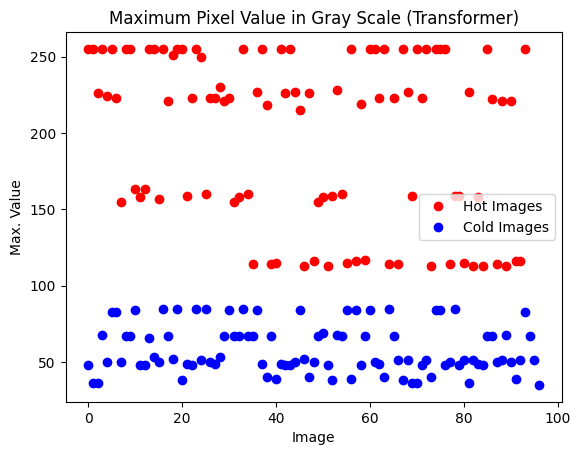

In [10]:
# Plot train data
plt.figure()
plt.title('Maximum Pixel Value in Gray Scale (Transformer)')
plt.plot(X_train[y_train==1],'o',color='red')
plt.plot(X_train[y_train==0],'o',color='blue')
plt.legend(["Hot Images","Cold Images"])
plt.xlabel('Image')
plt.ylabel('Max. Value')
plt.show()

As it is shown in the figure, there is a clear difference between the maximum values of the pixels of the cold and the hot images. In this sense, the classification can be done by setting a linear threshold using SVM

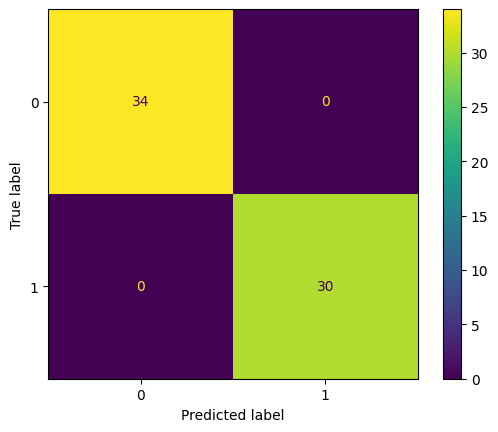

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf = svm.SVC(random_state=0)
clf.fit(X_train.reshape(-1, 1), y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

It makes a perfect classification (which is not surprising due to the fact that the classes are quite distant). However, from the plot of the train data it is evident that the data is grouped in more than two subgroups focusing only on the max_value pixel. In this sense, we are going to explore the dataset with KMeans trying to distinguish those subgroups and the number of clusters is going to be determined through the elbow method.

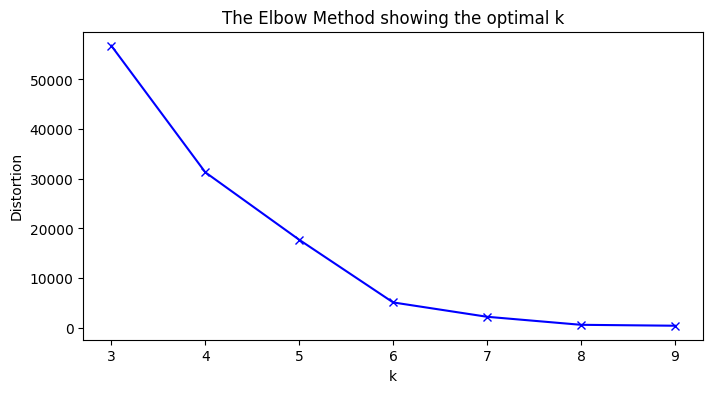

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

distortions = []
K = range(3,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=28)
    kmeanModel.fit(X_train.reshape(-1, 1))
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is evident that for 2 < k < 10 the "elbow" is 6. So the KMeans model will be implemented with k = 6.

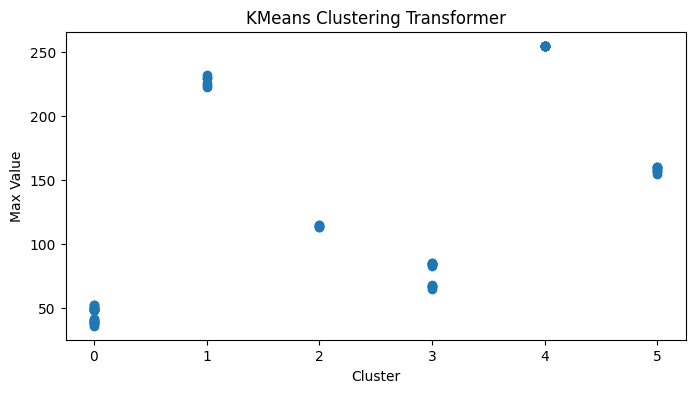

In [13]:
kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(X_train.reshape(-1, 1))
y_kmeans = kmeanModel.predict(X_test.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.scatter(y_kmeans,X_test.reshape(-1, 1), cmap=plt.cm.Set1)
plt.xlabel('Cluster')
plt.ylabel('Max Value')
plt.title('KMeans Clustering Transformer')
plt.show()

To find the Region of Interest (RoI), the cluster classification will be added to the dataset and the segmentation parameters will be assigned conveniently according to their cluster classification.

In [14]:
max_values_for_classification = np.array(dataset_transformer['max_value'])
clusters_labels = kmeanModel.predict(max_values_for_classification.reshape(-1, 1))
dataset_transformer['clusters'] = clusters_labels
dataset_transformer

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label,clusters
0,p1014.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.172344,9.033984,0,p1_Noload,0
1,p1006.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,22.899714,8.748136,0,p1_Noload,0
2,p1009.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.860182,8.807629,0,p1_Noload,0
3,p1015.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,21.976549,9.010382,0,p1_Noload,0
4,p1019.bmp,"96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,99,1...",48,12,22.370872,9.140633,0,p1_Noload,0
...,...,...,...,...,...,...,...,...,...
250,p9119.bmp,"150,0,104,150,0,104,150,0,104,150,0,104,151,0,...",255,20,65.031315,49.438930,1,p9_600,4
251,p9087.bmp,"151,0,107,151,0,107,151,0,107,151,0,107,151,0,...",255,17,61.775820,48.363031,1,p9_600,4
252,p9116.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,140,1,70,1...",255,18,63.945937,49.061239,1,p9_600,4
253,p9109.bmp,"138,1,66,138,1,66,138,1,66,138,1,66,141,1,75,1...",255,18,63.790052,49.066734,1,p9_600,4


Export data to csv


In [15]:
dataset_transformer.to_csv('dataset_transformer.csv')

Selection of one image per cluster to draw the final masks

In [16]:
print(dataset_transformer[dataset_transformer['filename'] == 'p5045.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p9109.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p7049.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p1014.bmp']['clusters']) 
print(dataset_transformer[dataset_transformer['filename'] == 'p8078.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p6020.bmp']['clusters'])

127    3
Name: clusters, dtype: int32
253    4
Name: clusters, dtype: int32
177    5
Name: clusters, dtype: int32
0    0
Name: clusters, dtype: int32
211    1
Name: clusters, dtype: int32
134    2
Name: clusters, dtype: int32


### **IDENTIFYING RoI (REGION OF INTEREST)**

MANUAL SEGMENTATION

Importation of 6 masks, one for each cluster.

In [17]:
# Import images
img_p1014 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/p1_Noload/p1014.bmp')
img_p5045 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/p5_320/p5045.bmp')
img_p6020 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/p6_400/p6020.bmp')
img_p7049 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/p7_480/p7049.bmp')
img_p8078 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/p8_560/p8078.bmp')
img_p9109 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/p9_600/p9109.bmp')


# Import masks
manual_mask_p1014 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/manual_masks/p1014_mask.jpg')
manual_mask_p5045 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/manual_masks/p5045_mask.jpg')
manual_mask_p6020 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/manual_masks/p6020_mask.jpg')
manual_mask_p7049 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/manual_masks/p7049_mask.jpg')
manual_mask_p8078 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/manual_masks/p8078_mask.jpg')
manual_mask_p9109 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/manual_masks/p9109_mask.jpg')



   It is necesary to convert images from BGR TO RGB in order to make a good visualization of the IR colors

In [18]:
# RGB images
img_p1014_rgb = cv2.cvtColor(img_p1014, cv2.COLOR_BGR2RGB)
img_p5045_rgb = cv2.cvtColor(img_p5045, cv2.COLOR_BGR2RGB)
img_p6020_rgb = cv2.cvtColor(img_p6020, cv2.COLOR_BGR2RGB)
img_p7049_rgb = cv2.cvtColor(img_p7049, cv2.COLOR_BGR2RGB)
img_p8078_rgb = cv2.cvtColor(img_p8078, cv2.COLOR_BGR2RGB)
img_p9109_rgb = cv2.cvtColor(img_p9109, cv2.COLOR_BGR2RGB)

# RGB masks
manual_mask_p1014_rgb = cv2.cvtColor(manual_mask_p1014, cv2.COLOR_BGR2RGB)
manual_mask_p5045_rgb = cv2.cvtColor(manual_mask_p5045, cv2.COLOR_BGR2RGB)
manual_mask_p6020_rgb = cv2.cvtColor(manual_mask_p6020, cv2.COLOR_BGR2RGB)
manual_mask_p7049_rgb = cv2.cvtColor(manual_mask_p7049, cv2.COLOR_BGR2RGB)
manual_mask_p8078_rgb = cv2.cvtColor(manual_mask_p8078, cv2.COLOR_BGR2RGB)
manual_mask_p9109_rgb = cv2.cvtColor(manual_mask_p9109, cv2.COLOR_BGR2RGB)

The gray images are also required to create and compare the masks

In [19]:
# gray images
img_p1014_gray = cv2.cvtColor(img_p1014, cv2.COLOR_BGR2GRAY)
img_p5045_gray = cv2.cvtColor(img_p5045, cv2.COLOR_BGR2GRAY)
img_p6020_gray = cv2.cvtColor(img_p6020, cv2.COLOR_BGR2GRAY)
img_p7049_gray = cv2.cvtColor(img_p7049, cv2.COLOR_BGR2GRAY)
img_p8078_gray = cv2.cvtColor(img_p8078, cv2.COLOR_BGR2GRAY)
img_p9109_gray = cv2.cvtColor(img_p9109, cv2.COLOR_BGR2GRAY)

# gray masks
manual_mask_p1014_gray = cv2.cvtColor(manual_mask_p1014, cv2.COLOR_BGR2GRAY)
manual_mask_p5045_gray = cv2.cvtColor(manual_mask_p5045, cv2.COLOR_BGR2GRAY)
manual_mask_p6020_gray = cv2.cvtColor(manual_mask_p6020, cv2.COLOR_BGR2GRAY)
manual_mask_p7049_gray = cv2.cvtColor(manual_mask_p7049, cv2.COLOR_BGR2GRAY)
manual_mask_p8078_gray = cv2.cvtColor(manual_mask_p8078, cv2.COLOR_BGR2GRAY)
manual_mask_p9109_gray = cv2.cvtColor(manual_mask_p9109, cv2.COLOR_BGR2GRAY)

Image visualization:

To create the mask (which only has black and white pixels) that we will compare with the automated segmentation, all pixels that have values greater than zero in the gray images will be converted to pixels with values equal t0 255.

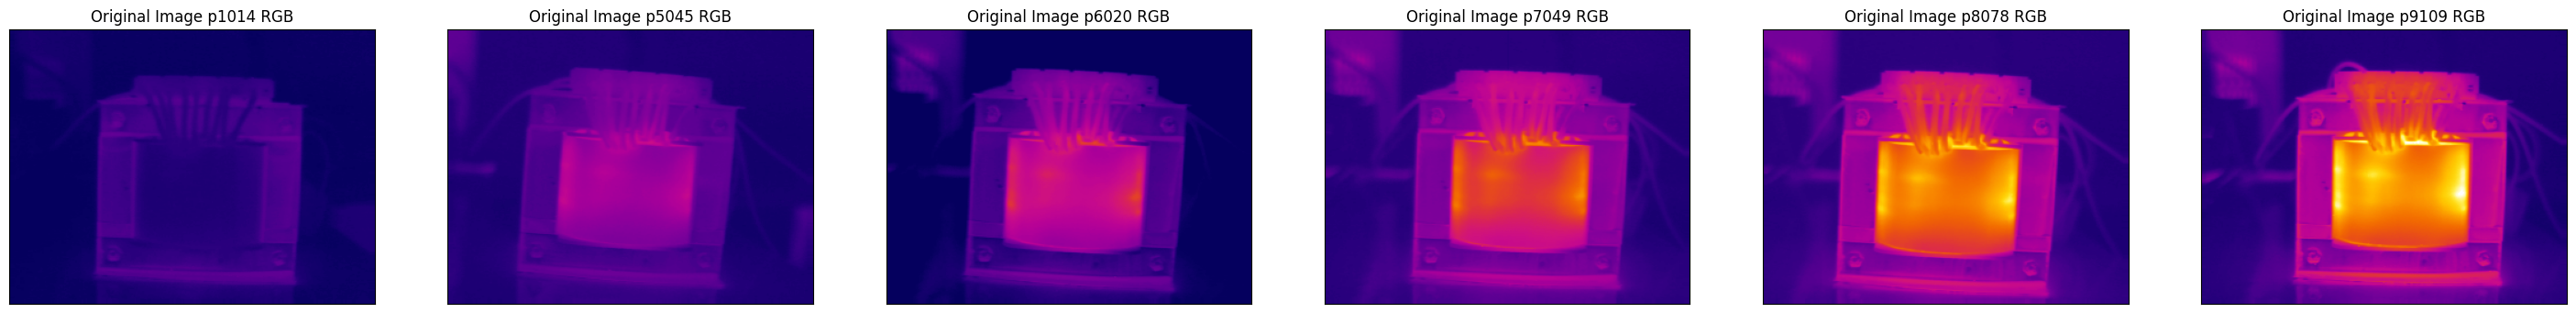

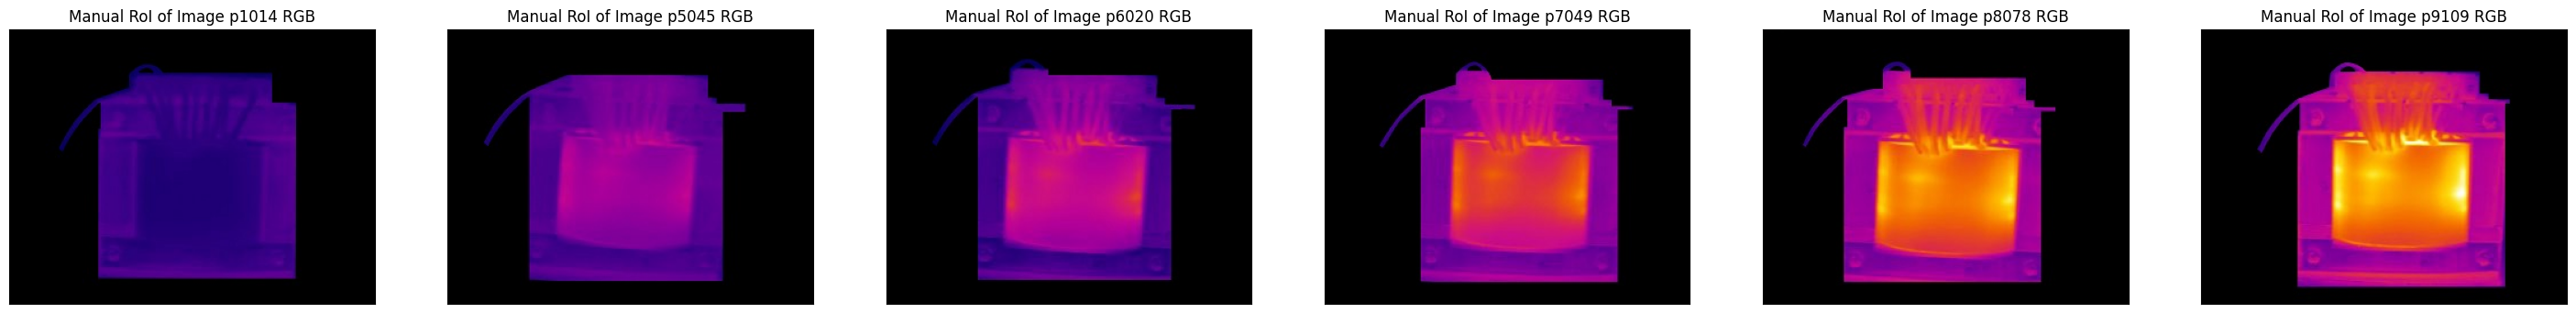

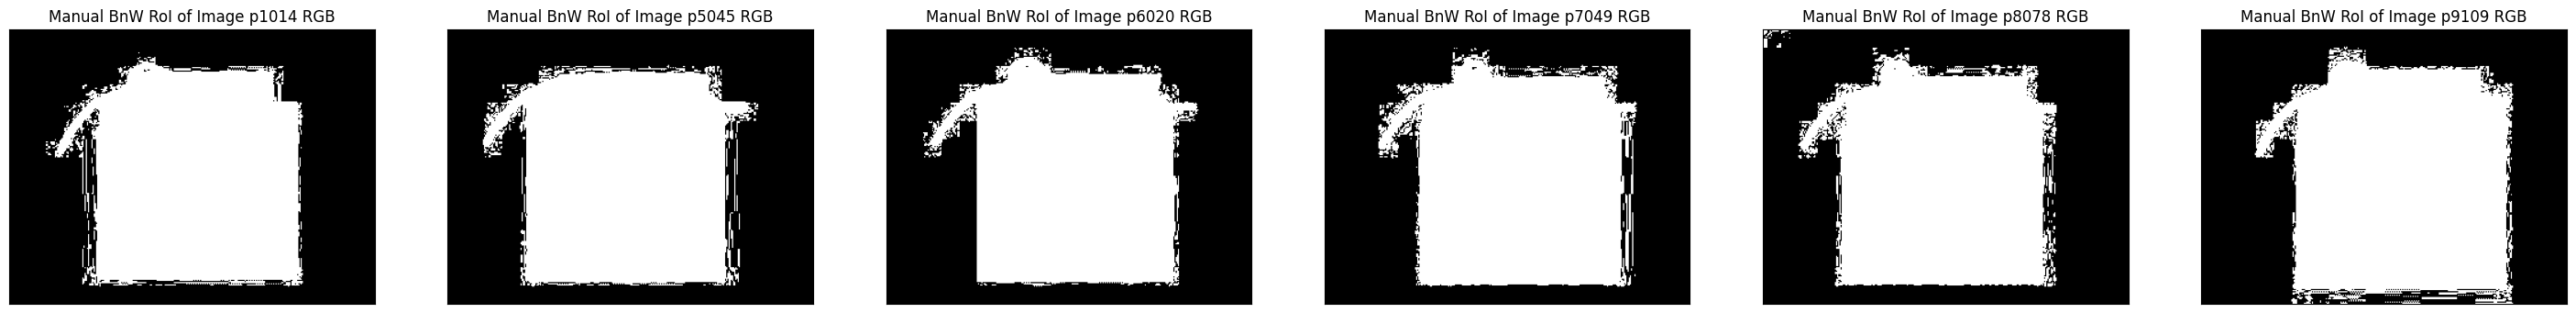

In [20]:
# Visualize original images vs masks (RGB)

plt.figure(figsize=(36,6)) # Create figure of dimensions 36 x 6

plt.subplot(161) # Locate image
plt.title('Original Image p1014 RGB') # Title
plt.imshow(img_p1014_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(162) # Locate image
plt.title('Original Image p5045 RGB') # Title
plt.imshow(img_p5045_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(163) # Locate image
plt.title('Original Image p6020 RGB') # Title
plt.imshow(img_p6020_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(164) # Locate image
plt.title('Original Image p7049 RGB') # Title
plt.imshow(img_p7049_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(165) # Locate image
plt.title('Original Image p8078 RGB') # Title
plt.imshow(img_p8078_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(166) # Locate image
plt.title('Original Image p9109 RGB') # Title
plt.imshow(img_p9109_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

plt.figure(figsize=(36,6)) # Create figure of dimensions 36 x 6

plt.subplot(161) # Locate mask
plt.title('Manual RoI of Image p1014 RGB') # Title
plt.imshow(manual_mask_p1014_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(162) # Locate mask
plt.title('Manual RoI of Image p5045 RGB') # Title
plt.imshow(manual_mask_p5045_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(163) # Locate mask
plt.title('Manual RoI of Image p6020 RGB') # Title
plt.imshow(manual_mask_p6020_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(164) # Locate mask
plt.title('Manual RoI of Image p7049 RGB') # Title
plt.imshow(manual_mask_p7049_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(165) # Locate mask
plt.title('Manual RoI of Image p8078 RGB') # Title
plt.imshow(manual_mask_p8078_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(166) # Locate mask
plt.title('Manual RoI of Image p9109 RGB') # Title
plt.imshow(manual_mask_p9109_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

manual_mask_p1014_BnW = manual_mask_p1014_gray # Take gray scale image
manual_mask_p1014_BnW[manual_mask_p1014_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_p5045_BnW = manual_mask_p5045_gray # Take gray scale image
manual_mask_p5045_BnW[manual_mask_p5045_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_p6020_BnW = manual_mask_p6020_gray # Take gray scale image
manual_mask_p6020_BnW[manual_mask_p6020_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_p7049_BnW = manual_mask_p7049_gray # Take gray scale image
manual_mask_p7049_BnW[manual_mask_p7049_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_p8078_BnW = manual_mask_p8078_gray # Take gray scale image
manual_mask_p8078_BnW[manual_mask_p8078_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_p9109_BnW = manual_mask_p9109_gray # Take gray scale image
manual_mask_p9109_BnW[manual_mask_p9109_BnW > 0] = 255 # Convert every non-black pixel to white

# Visualize Black and White masks

plt.show() # Show plot with images

plt.figure(figsize=(36,6)) # Create figure of dimensions 36 x 6

plt.subplot(161) # Locate mask
plt.title('Manual BnW RoI of Image p1014 RGB') # Title
plt.imshow(manual_mask_p1014_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(162) # Locate mask
plt.title('Manual BnW RoI of Image p5045 RGB') # Title
plt.imshow(manual_mask_p5045_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(163) # Locate mask
plt.title('Manual BnW RoI of Image p6020 RGB') # Title
plt.imshow(manual_mask_p6020_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(164) # Locate mask
plt.title('Manual BnW RoI of Image p7049 RGB') # Title
plt.imshow(manual_mask_p7049_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(165) # Locate mask
plt.title('Manual BnW RoI of Image p8078 RGB') # Title
plt.imshow(manual_mask_p8078_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(166) # Locate mask
plt.title('Manual BnW RoI of Image p9109 RGB') # Title
plt.imshow(manual_mask_p9109_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images



Next, we introduce functions that generalize the previous steps, starting by the contrast modification in the RGB space and then the definition of the RoI:

In [21]:
 def increase_contrast_RGB2GRAY(img_rgb):
  # converting to LAB color space
  lab= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
  l_channel, a, b = cv2.split(lab)

  # Applying CLAHE to L-channel
  # feel free to try different values for the limit and grid size:
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl = clahe.apply(l_channel)

  # merge the CLAHE enhanced L-channel with the a and b channel
  limg_rgb = cv2.merge((cl,a,b))

  # Converting image from LAB Color model to BGR color spcae
  enhanced_img_rgb = cv2.cvtColor(limg_rgb, cv2.COLOR_LAB2BGR)
  img_gray = cv2.cvtColor(enhanced_img_rgb, cv2.COLOR_RGB2GRAY)

  return img_gray

According to the cluster of the image, the parameters and the process will slightly vary.

In [22]:
def find_RoI(img_gray):
  # OTSU 1
  [_,OTSU] = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU) 
  kernel_ones= np.ones((3,3), np.uint8)#Create a simple ones kernel

  img_temp = np.copy(img_gray)
  img_temp[OTSU == 255] = 0
  img_temp_erode = cv2.erode(img_temp, kernel_ones, iterations=5)
  """
  # OTSU 2
  [_,OTSU2] = cv2.threshold(img_temp_erode, 0, 255, cv2.THRESH_OTSU)
  [cnt, markers] = cv2.connectedComponents(OTSU2)
  mask1 = np.uint8(markers==1)
  mask1 = cv2.dilate(mask1, kernel_ones, iterations=7)
  OTSU[mask1 > 0] = 255
  OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)"""

  return OTSU


Visualize the automated result vs the manual masks

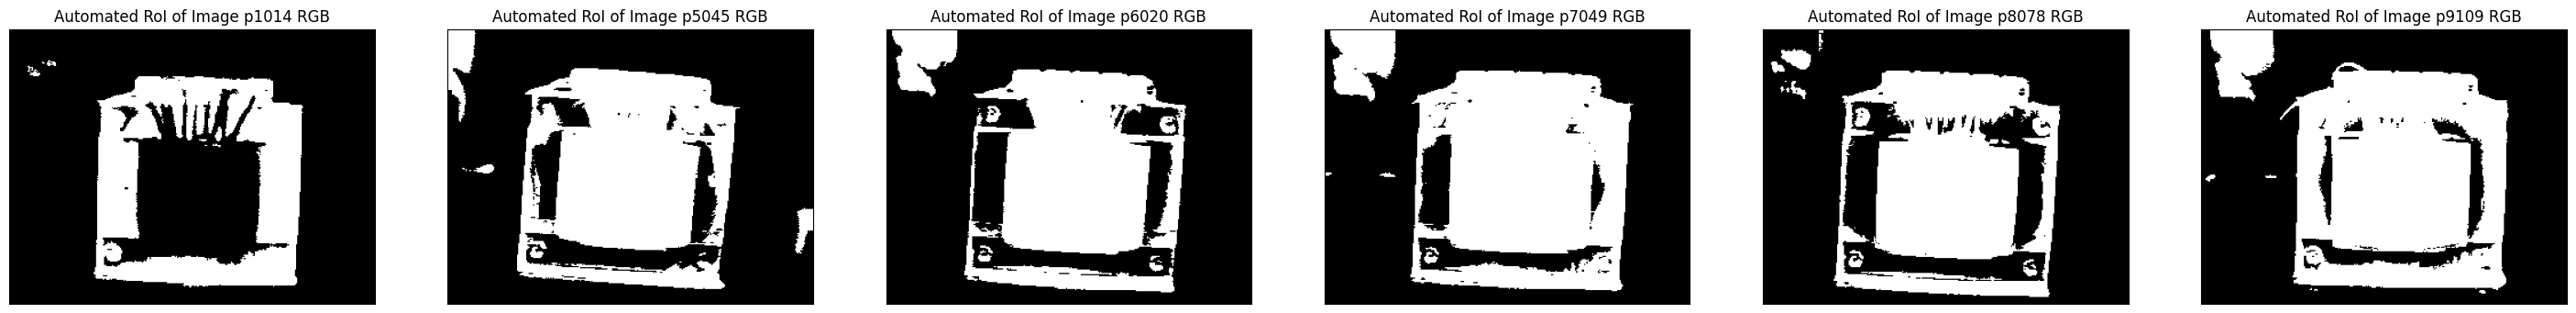

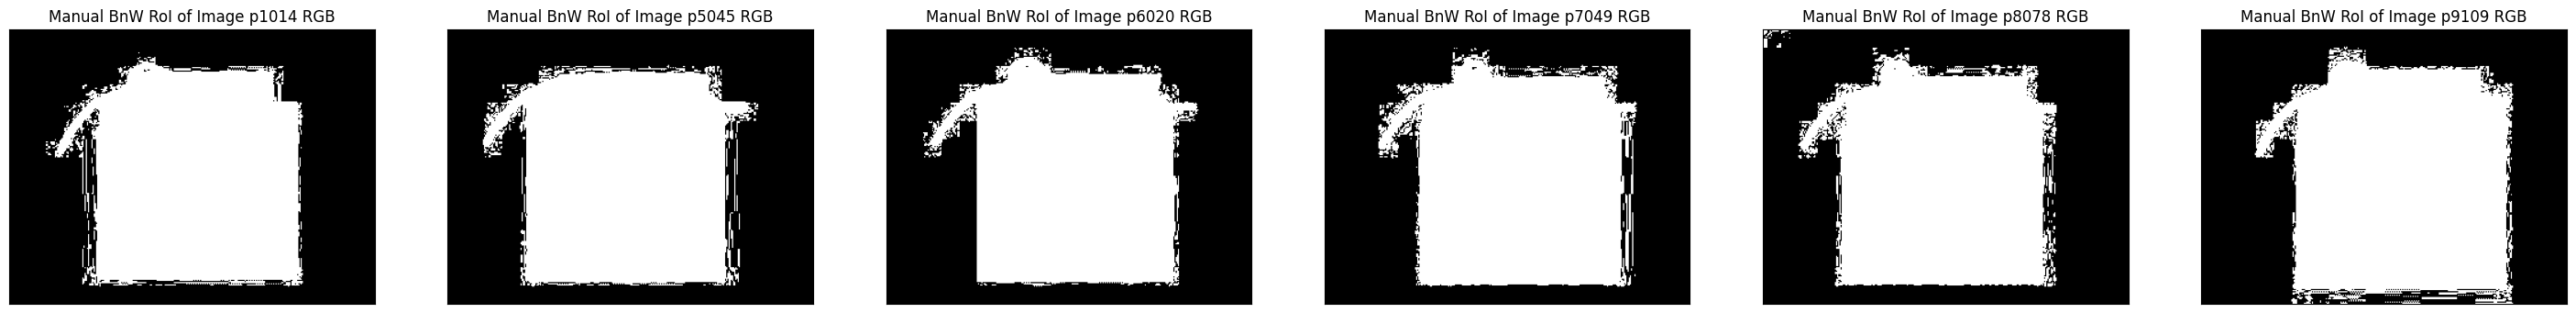

In [23]:
img_p1014_test = find_RoI(increase_contrast_RGB2GRAY(img_p1014_rgb))
img_p5045_test = find_RoI(increase_contrast_RGB2GRAY(img_p5045_rgb))
img_p6020_test = find_RoI(increase_contrast_RGB2GRAY(img_p6020_rgb))
img_p7049_test = find_RoI(increase_contrast_RGB2GRAY(img_p7049_rgb))
img_p8078_test = find_RoI(increase_contrast_RGB2GRAY(img_p8078_rgb))
img_p9109_test = find_RoI(increase_contrast_RGB2GRAY(img_p9109_rgb))

# Visualize automated masks

plt.figure(figsize=(36,6)) # Create figure of dimensions 36 x 6

plt.subplot(161) # Locate image
plt.title('Automated RoI of Image p1014 RGB') # Title
plt.imshow(img_p1014_test,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(162) # Locate image
plt.title('Automated RoI of Image p5045 RGB') # Title
plt.imshow(img_p5045_test,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(163) # Locate image
plt.title('Automated RoI of Image p6020 RGB') # Title
plt.imshow(img_p6020_test,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(164) # Locate image
plt.title('Automated RoI of Image p7049 RGB') # Title
plt.imshow(img_p7049_test,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(165) # Locate image
plt.title('Automated RoI of Image p8078 RGB') # Title
plt.imshow(img_p8078_test,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(166) # Locate image
plt.title('Automated RoI of Image p9109 RGB') # Title
plt.imshow(img_p9109_test,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

# Visualize Black and White masks

plt.show() # Show plot with images

plt.figure(figsize=(36,6)) # Create figure of dimensions 36 x 6

plt.subplot(161) # Locate mask
plt.title('Manual BnW RoI of Image p1014 RGB') # Title
plt.imshow(manual_mask_p1014_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(162) # Locate mask
plt.title('Manual BnW RoI of Image p5045 RGB') # Title
plt.imshow(manual_mask_p5045_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(163) # Locate mask
plt.title('Manual BnW RoI of Image p6020 RGB') # Title
plt.imshow(manual_mask_p6020_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(164) # Locate mask
plt.title('Manual BnW RoI of Image p7049 RGB') # Title
plt.imshow(manual_mask_p7049_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(165) # Locate mask
plt.title('Manual BnW RoI of Image p8078 RGB') # Title
plt.imshow(manual_mask_p8078_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(166) # Locate mask
plt.title('Manual BnW RoI of Image p9109 RGB') # Title
plt.imshow(manual_mask_p9109_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images



Comparison between the final resuslt with the manual masks using the Jaccard Score

In [24]:
manual_mask_p1014_BnW.shape

(240, 320)

In [25]:
from sklearn.metrics import jaccard_score

J_p1014 = jaccard_score(manual_mask_p1014_BnW, img_p1014_test, average='micro')
print("Jaccard score Image p1014:", J_p1014*100, "%")

J_p5045 = jaccard_score(manual_mask_p5045_BnW, img_p5045_test, average='micro')
print("Jaccard score Image p5045:", J_p5045*100, "%")

J_p6020 = jaccard_score(manual_mask_p6020_BnW, img_p6020_test, average='micro')
print("Jaccard score Image p6020:", J_p6020*100, "%")

J_p7049 = jaccard_score(manual_mask_p7049_BnW, img_p7049_test, average='micro')
print("Jaccard score Image p7049:", J_p7049*100, "%")

J_p8078 = jaccard_score(manual_mask_p8078_BnW, img_p8078_test, average='micro')
print("Jaccard score Image p8078:", J_p8078*100, "%")

J_p9109 = jaccard_score(manual_mask_p9109_BnW, img_p9109_test, average='micro')
print("Jaccard score Image p9109:", J_p9109*100, "%")

Jaccard score Image p1014: 49.85933653733443 %
Jaccard score Image p5045: 65.82894093354345 %
Jaccard score Image p6020: 58.88513782928839 %
Jaccard score Image p7049: 69.97399788893752 %
Jaccard score Image p8078: 58.65183972107029 %
Jaccard score Image p9109: 72.78807094025562 %
